In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
## Constants
G = 6.6743 * 1e-11 # Gravitational constant
M_Sun = 1.9885 * 1e30 # mass of the Sun in kg (from NASA)
R_earth = 6.371 * 1e6 # average radius of the earth in meters (from Wikipedia)
cm_to_m = 1e-2 # cm to m conversion

Implementation for Part(B)

In [40]:
def read_data(filename, plot_flag = False):
    ## Reads the data wd data and plots and returns the data with asked scalings and conversions

    ## Retrieve the data from the file
    data = pd.read_csv(filename)

    ## Extract the data
    wdid_array = np.asarray(data.wdid)
    logg_array = np.asarray(data.logg)
    mass_array = np.asarray(data.mass)
    
    ## Convert to radius using Newtonian gravity    
    scaled_r_array = (np.sqrt(G * (mass_array * M_Sun) / (cm_to_m * np.power(10,logg_array)))) / R_earth # scaled radii in units of average earth radius
    
    ## Plot the data
    if (plot_flag):
        plt.figure(figsize=(12,7))
        plt.scatter(scaled_r_array, mass_array)
        plt.xlabel("Radius (Average Earth Radius)")
        plt.ylabel("Mass (Solar Mass)")
        plt.title("Mass vs Radius of White Dwarf Data")
        plt.show()
    return mass_array, scaled_r_array


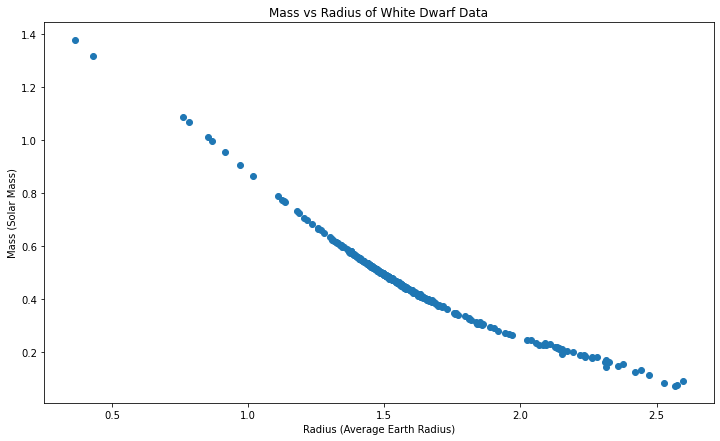

In [42]:
read = read_data("white_dwarf_data.csv",True)

Implementation for Part(C)

In [167]:
def fit_data():
    mass_data, r_data = read_data("white_dwarf_data.csv")
    mass_threshold = 0.4 # Solar Mass unit

    ## Filter the data using the mass threshold
    filtered_mass_data = mass_data[mass_data<mass_threshold] # Filtered Mass Data
    filtered_r_data = r_data[mass_data<mass_threshold] # Filtered Radius Data
    N = filtered_mass_data.shape[0] # Number of samples after filtering 

    ## I will do a linear fit to the logarithmic data due to the linear relation between lnM and lnR
    ln_filtered_r_data = np.log(filtered_r_data)
    ln_filtered_mass_data = np.log(filtered_mass_data)


    ## Do a linear fit
    fit_coefficients = np.polyfit(ln_filtered_r_data, ln_filtered_mass_data, 1)
    poly1d_fn = np.poly1d(fit_coefficients) 
    # To visualize the data 
    plt.figure(figsize=(8,5))
    plt.plot(ln_filtered_r_data,ln_filtered_mass_data, 'yo', ln_filtered_r_data, poly1d_fn(ln_filtered_r_data), '--k')
    plt.xlabel("Radius (Average Earth Radius) - Logarithmic Scale")
    plt.ylabel("Mass (Solar Mass)")
    plt.title("Mass vs Radius of White Dwarf Data (Dwarf Mass < 0.4 Solar Mass)")  
    plt.show()
    
     

    
    

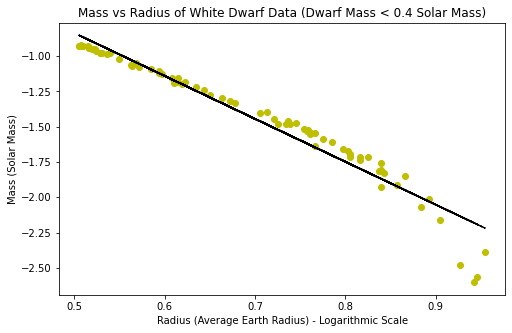

In [168]:
fit_data()